### First we need import all libraries that we will use in this list

In [ ]:
from math import *
from numpy import arange, array
from pylab import plot, xlabel, ylabel, show, legend
from matplotlib import pyplot as plt

### Problema 1 - Filtro passa-baixo

Alternative **a)** Write a program that solve the equations using the Rouge-Kutta method

In [ ]:
def func1(Vout, t, RC):
  tt_down = floor(2*t)

  if (tt_down % 2) == 0:
    Vin = 1
  else:
    Vin = -1

  return (Vin - Vout)/RC

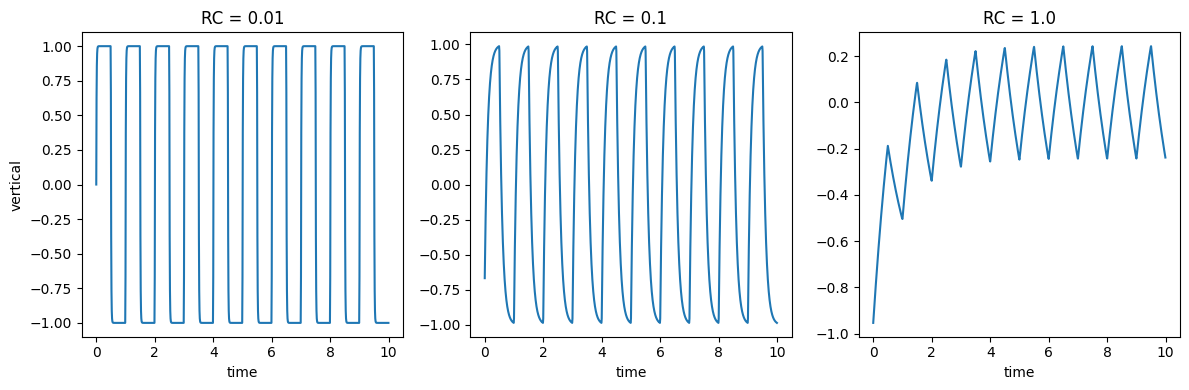

In [ ]:
a = 0
b = 10
N = 1000
h = (b-a)/N
RC = array([0.01, 0.1, 1])

tpoints = arange(a, b, h)
lists_each_RC, xpoints = [], []

Vout = 0

for RC_value in RC:
  for t in tpoints:

    xpoints.append(Vout)
    k1 = h*func1(Vout, t, RC_value)
    k2 = h*func1(Vout+0.5*k1, t+0.5*h, RC_value)
    k3 = h*func1(Vout+0.5*k2, t+0.5*h, RC_value)
    k4 = h*func1(Vout+k3, t+h, RC_value)
    Vout += (k1+2*k2+2*k3+k4)/6

  lists_each_RC.append(xpoints)
  xpoints = []

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i in range(3):
  axs[i].plot(tpoints, lists_each_RC[i])
  axs[i].set_title(f'RC = {RC[i]}')
  axs[i].set_xlabel('time')

axs[0].set_ylabel('vertical')
plt.tight_layout()
plt.show()

Alternative **b)** We can observe that the capacitor is charging and discharging over the ten seconds of time. By plotting just a portion of the graphs we can see the exponential charging and discharging behavior of the capacitor, as shown in books

The different values ​​for the RC (**time constant** of the circuit) give us different slopes for the capacitor charges and discharges. When RC is very low (first case), we have an almost instantaneous charge and discharge. At its intermediate value (second case), we can see the exponential behavior mentioned previously. At value 1 (third case), we observe an approximately constant and slower slope than the previous ones.

If we limit the plot of the second graph we can see the exponential behavior for the charging and discharging of the capacitor:

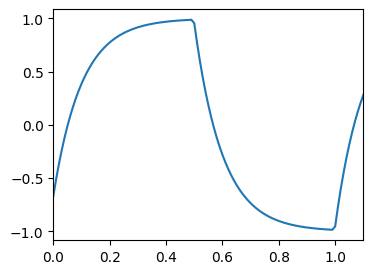

In [ ]:
fig, ax = plt.subplots(figsize=(4, 3))

ax.plot(tpoints, lists_each_RC[1])
ax.set_xlim(0, 1.1)

plt.show()

### Problem 2 - Lotka-Volterra equations

Alternative **a)** Write a program that solve the equations using the Rouge-Kutta method

In [ ]:
def func2(r, t):
  alpha, betha, gamma, delta = 1, 0.5, 0.5, 2

  x, y = r[0], r[1]
  fx = alpha*x - betha*x*y
  fy = gamma*x*y - delta*y

  return array([fx, fy], float)

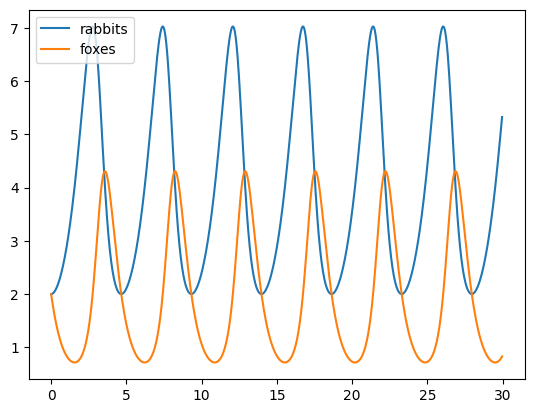

In [ ]:
a = 0
b = 30
N = 1000
h = (b-a)/N
r = array([2, 2], float)

tpoints = arange(a, b, h)
xpoints, ypoints = [], []

for t in tpoints:
  xpoints.append(r[0])
  ypoints.append(r[1])

  k1 = h*func2(r, t)
  k2 = h*func2(r+0.5*k1, t+0.5*h)
  k3 = h*func2(r+0.5*k2, t+0.5*h)
  k4 = h*func2(r+k3, t+h)
  r += (k1+2*k2+2*k3+k4)/6

plt.plot(tpoints, xpoints, label= "rabbits")
plt.plot(tpoints, ypoints, label = "foxes")

plt.legend()
plt.show()

Alternative **b)** We can see that when the fox population starts to increase, the rabbit population is temporarily decreasing, because foxes eat rabbits.

The fox population begins to decrease due to natural characteristics, then the rabbit population tends to increase (because there are fewer foxes) causing the decrease in the fox population to be slowed and subsequently begin to increase again.


This natural process of interaction between these two populations is cyclical, where the behavior of each population influences the other, which in turn, influences its own population subsequently.

### Problem 3 - The Lorentz equations

Alternative **a)** Solve the Lorentz equations and plot graphic:

In [ ]:
def func3(vector, t):
  sigma, r, b = 10, 28, 8/3

  x, y, z = vector[0], vector[1], vector[2]
  fx = sigma*(y-x)
  fy = r*x - y - x*z
  fz = x*y - b*z

  return array([fx, fy, fz], float)

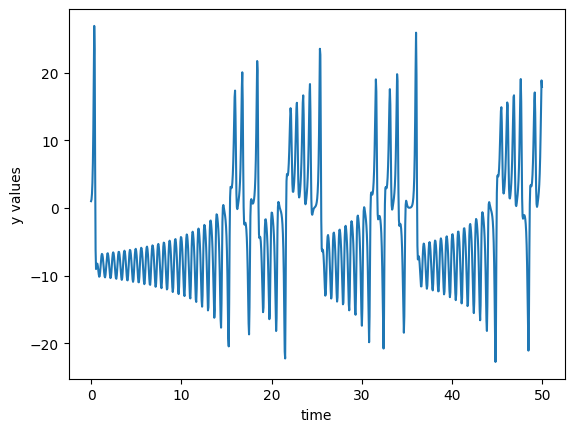

In [ ]:
a = 0
b = 50
N = 1000
h = (b-a)/N
vector = array([0, 1, 0], float)

tpoints = arange(a, b, h)
xpoints, ypoints, zpoints = [], [], []

for t in tpoints:
  xpoints.append(vector[0])
  ypoints.append(vector[1])
  zpoints.append(vector[2])

  k1 = h*func3(vector, t)
  k2 = h*func3(vector+0.5*k1, t+0.5*h)
  k3 = h*func3(vector+0.5*k2, t+0.5*h)
  k4 = h*func3(vector+k3, t+h)
  vector += (k1+2*k2+2*k3+k4)/6

plt.xlabel('time')
plt.ylabel('y values')
plt.plot(tpoints, ypoints)
plt.show()

Alternative **b)** Modify the program to plot z in function of x, known as **strange attractor**:

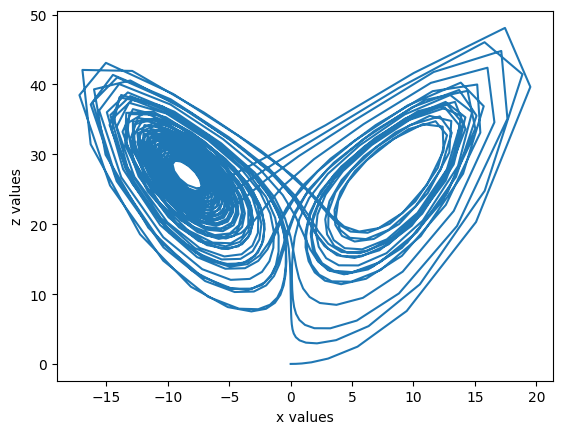

In [ ]:
plt.xlabel('x values')
plt.ylabel('z values')
plt.plot(xpoints, zpoints)
plt.show()

### Problem 4 - The nonlinear pendulum

In [ ]:
def func4(r, t):
  g, l = 9.81, 0.1
  theta, omega = r[0], r[1]

  fx = omega
  fy = -(g/l)*sin(theta)

  return array([fx, fy], float)

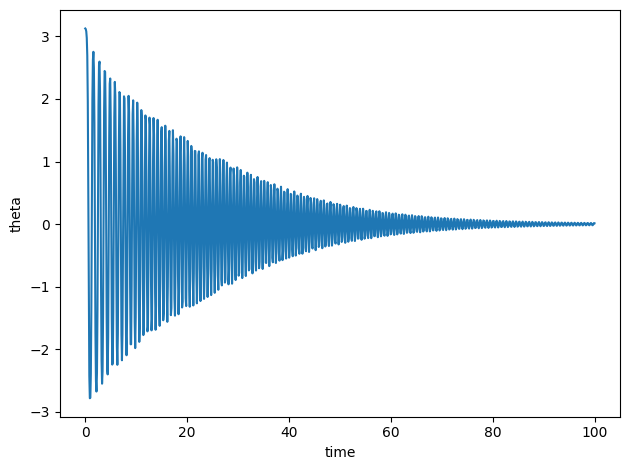

In [ ]:
a = 0
b = 100
N = 1000
h = (b-a)/N
r = array([radians(179), 0], float)

tpoints = arange(a, b, h)
thet_points, omg_points = [], []

for t in tpoints:
  thet_points.append(r[0])
  omg_points.append(r[1])

  k1 = h*func4(r, t)
  k2 = h*func4(r+0.5*k1, t+0.5*h)
  k3 = h*func4(r+0.5*k2, t+0.5*h)
  k4 = h*func4(r+k3, t+h)
  r += (k1+2*k2+2*k3+k4)/6

plt.plot(tpoints, thet_points)
plt.xlabel('time')
plt.ylabel('theta')

plt.tight_layout()
plt.show()